<a href="https://colab.research.google.com/github/Praveena-Goskula/hdp.github.io/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dependencies**


In [329]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#dependencies for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

#dependencies for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#dependencies for Artificial Neural Network
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix

#dependencies for XGBoost
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False)
import xgboost as xgb



**Data collection and preprocessing**

In [276]:
#loading csv data to pandas data frame
data=pd.read_csv('/content/drive/MyDrive/hdp/heart.csv')

In [277]:
#print first 5 rows of dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [278]:
#print last 5 rows of dataset
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [279]:
#number of rows and colums of dataset
data.shape

(1025, 14)

In [280]:
#getting some info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [281]:
#checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [282]:
#some statistical measures about the data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


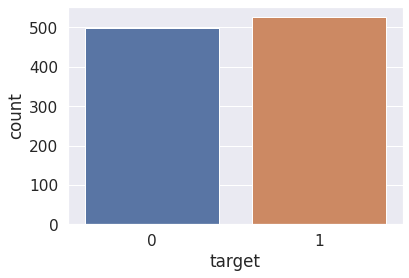

In [283]:
sns.countplot(data['target'])

In [284]:
#checking the distribution of target variable
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1-->defective heart
0-->healthy heart

**splitting the features and target**

In [285]:
x=data.drop(columns='target', axis=1)
y=data['target']

axis=1 --> for column


axis=0 --> for row

In [286]:
print(x)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [287]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


**Splitting the data into train and test data**

In [288]:
x_train , x_test , y_train , y_test=train_test_split(x , y, test_size=0.2, stratify=y,random_state=2)

In [289]:
print(x.shape,x_train.shape,x_test.shape)

(1025, 13) (820, 13) (205, 13)


**Model training**

**Logistic Regresssion**

In [290]:
model1=LogisticRegression()

In [291]:
model1.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Model Evaluation**

**Accuracy Score**

In [292]:
#accuracy on training data
x_train_prediction=model1.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [293]:
print('accuracy on training data',training_data_accuracy)

accuracy on training data 0.8524390243902439


In [294]:
#accuracy on test data
x_test_prediction=model1.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)

**Performance**

In [295]:
#Calculate the probability scores of each point in the training set
y_train_score = model1.decision_function(x_train)
# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)
#Calculate the probability scores of each point in the test set
y_test_score = model.decision_function(x_test)
#Calculate the fpr, tpr, and thresholds for the test set
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

Text(0.5, 1.0, 'ROC Curve')

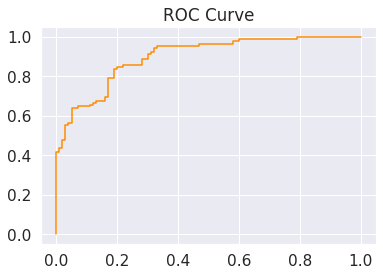

In [296]:
plt.plot(test_fpr, test_tpr, color='darkorange',  label='ROC curve')
plt.title("ROC Curve")

In [297]:
print('accuracy on test data',test_data_accuracy)

accuracy on test data 0.8048780487804879


**Building a prediction system**

In [298]:
input_data=(51,0,2,140,308,0,0,142,0,1.5,2,1,2)

#change the input data to a numpy array

input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=model1.predict(input_data_reshaped)

print(prediction)

if(prediction[0]==0):
  print("The person does not have heart disease")
else:
  print("The person has heart disease")  

[1]
The person has heart disease


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Random Forest**

In [299]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

**Model Evaluation**

**Accuracy Score**

In [300]:
#accuracy on training data
x_train_prediction1=rf_clf.predict(x_train)
training_data_accuracy1=accuracy_score(x_train_prediction1,y_train)

In [301]:
print('accuracy on training data',training_data_accuracy1)

accuracy on training data 1.0


In [302]:
#accuracy on test data
x_test_prediction1=rf_clf.predict(x_test)
test_data_accuracy1=accuracy_score(x_test_prediction1,y_test)

In [303]:
#performance
y_pred_test = rf_clf.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [304]:
confusion_matrix(y_test, y_pred_test)

array([[100,   0],
       [  0, 105]])

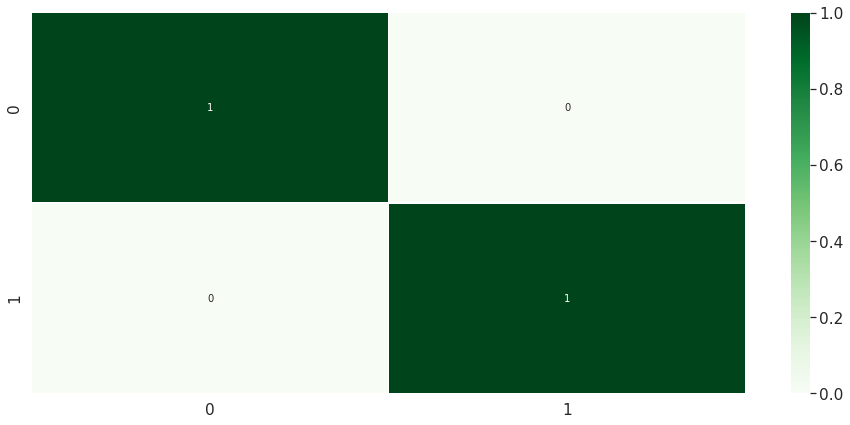

In [305]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)


In [306]:
print('accuracy on test data',test_data_accuracy1)

accuracy on test data 1.0


**Building a prediction system**

In [307]:
input_data=(51,0,2,140,308,0,0,142,0,1.5,2,1,2)

#change the input data to a numpy array

input_data_as_numpy_array=np.asarray(input_data)

#reshape the numpy array as we are predicting for only one instance

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction1=rf_clf.predict(input_data_reshaped)

print(prediction1)

if(prediction1[0]==0):
  print("The person does not have heart disease")
else:
  print("The person has heart disease") 

[1]
The person has heart disease


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Artificial neural network**

In [308]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Model Evaluation**

In [309]:
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13, 
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14, 
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [310]:
classifier.fit(x_train , y_train , batch_size = 8 ,epochs = 20  )

Epoch 1/20
103/103 [==============================] - 1s 2ms/step - loss: 0.6803 - accuracy: 0.6976
Epoch 2/20
103/103 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.8354
Epoch 3/20
103/103 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8573
Epoch 4/20
103/103 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8671
Epoch 5/20
103/103 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8720
Epoch 6/20
103/103 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8793
Epoch 7/20
103/103 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8780
Epoch 8/20
103/103 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8768
Epoch 9/20
103/103 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.8780
Epoch 10/20
103/103 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8817

In [311]:
epochs_hist = classifier.fit(x_train, y_train, epochs = 50,  verbose = 1, validation_split = 0.1)


Epoch 1/50
24/24 [==============================] - 0s 9ms/step - loss: 0.2684 - accuracy: 0.8957 - val_loss: 0.3191 - val_accuracy: 0.9024
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2680 - accuracy: 0.9024 - val_loss: 0.3234 - val_accuracy: 0.9024
Epoch 3/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2668 - accuracy: 0.9024 - val_loss: 0.3237 - val_accuracy: 0.9024
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2657 - accuracy: 0.9024 - val_loss: 0.3256 - val_accuracy: 0.9024
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2648 - accuracy: 0.9024 - val_loss: 0.3290 - val_accuracy: 0.9024
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.2652 - accuracy: 0.8902 - val_loss: 0.3337 - val_accuracy: 0.9024
Epoch 7/50
24/24 [==============================] - 0s 4ms/step - loss: 0.2647 - accuracy: 0.8970 - val_loss: 0.3328 - val_accuracy: 0.8902
Epoch 8/50
24/24 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


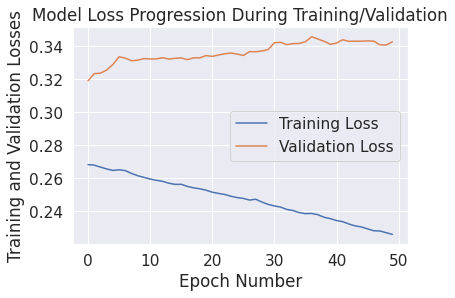

In [312]:
print(epochs_hist.history.keys())

plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



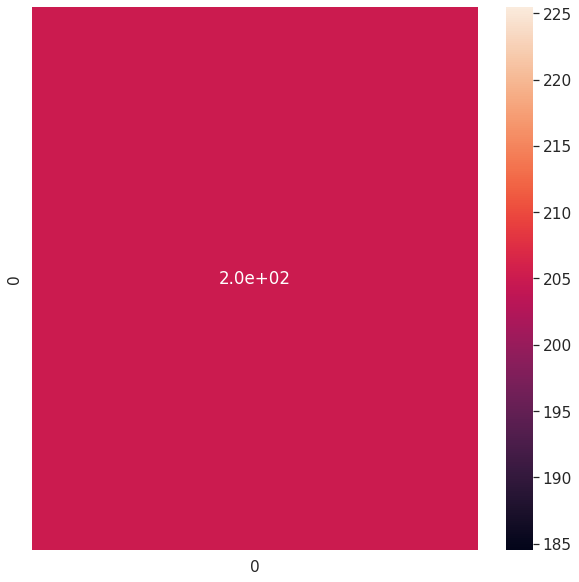

In [313]:
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
predicted = classifier.predict(x_test)

predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))
    
for i in y_test:
    test.append(np.argmax(i))

print(classification_report(test, predicted_value))

plt.figure(figsize=(10, 10))
cm=confusion_matrix(test, predicted_value)
sns.heatmap(cm, annot=True)
plt.show()

In [314]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

7/7 [==============================] - 0s 2ms/step


In [315]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[91,  9],
       [14, 91]])

(14.5, -0.5)

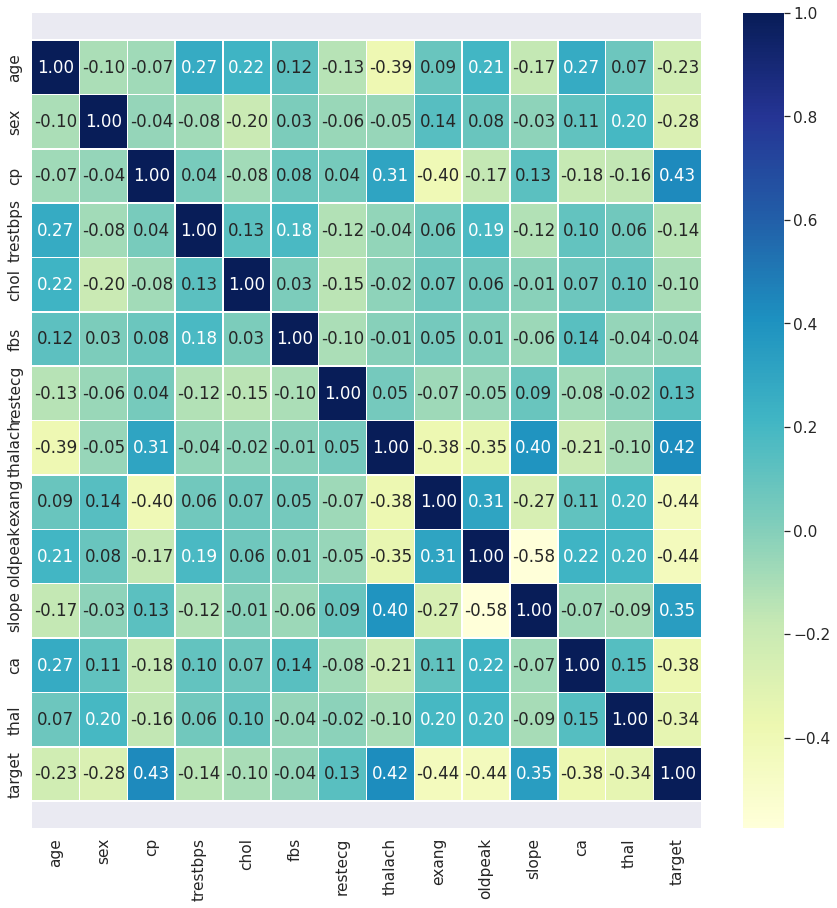

In [316]:
#correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**Accuracy score**

In [317]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

88.78048780487805


**xgboost**

In [318]:
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(x_train, y_train)

XGBClassifier(use_label_encoder=False)

In [319]:
from sklearn.metrics import confusion_matrix
import xgboost as xgb

**Model Evaluation**

In [320]:
my_model = xgb.XGBClassifier()
my_model.fit(x_train, y_train) 

XGBClassifier()

In [321]:
clf= xgb.XGBClassifier(n_estimators=1000,learning_rate=0.05,use_label_encoder=False )

In [322]:
clf.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

XGBClassifier(learning_rate=0.05, n_estimators=1000, use_label_encoder=False)

In [323]:
clf.best_iteration

4

In [324]:
clf= xgb.XGBClassifier(n_estimators = clf.best_iteration, random_state = 73,use_label_encoder=False )

In [325]:
clf.fit(x_train, y_train)

XGBClassifier(n_estimators=4, random_state=73, use_label_encoder=False)

In [326]:
feature_imp = pd.Series(clf.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

cp          0.352347
thal        0.194915
ca          0.140270
age         0.072976
sex         0.068788
slope       0.062887
thalach     0.049417
oldpeak     0.043206
trestbps    0.015194
chol        0.000000
fbs         0.000000
restecg     0.000000
exang       0.000000
dtype: float32

**Performance**

[0]	validation_0-logloss:0.641473	validation_1-logloss:0.644656
[1]	validation_0-logloss:0.59907	validation_1-logloss:0.605118
[2]	validation_0-logloss:0.562273	validation_1-logloss:0.570646
[3]	validation_0-logloss:0.531016	validation_1-logloss:0.542367
Accuracy: 0.839


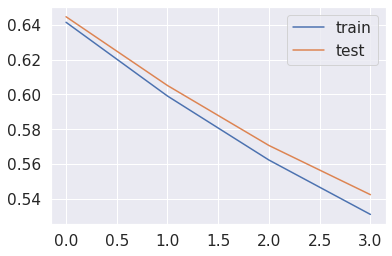

In [327]:
evalset = [(x_train, y_train), (x_test,y_test)]
# fit the model
clf.fit(x_train, y_train, eval_metric='logloss', eval_set=evalset)
# evaluate performance
from matplotlib import pyplot
yhat = clf.predict(x_test)
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)
# retrieve performance metrics
results = clf.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['logloss'], label='train')
pyplot.plot(results['validation_1']['logloss'], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [328]:
clf.score(x_test,y_test).round(4)

0.839